In [1]:
%cd hmr2//src
from utils import *

f:\Projects\Body Measurement\Current\hmr2\src
C:\Users\Sathiya\miniconda3\envs\TensorFlow-GPU\python.exe 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]


In [2]:
## Parameters ##
front_img_dir = "..\\..\\sample_data\\input\\34.jpg"
side_img_dir = "..\\..\\sample_data\\input\\35.jpg"
ht = 180

ht_factor = 5 # percentage of pixels to detect top of segmentation in the mask
neck_shift_factor = 0.025 # shifting neck point upward from models predicted point
waist_shift_factor = 0.04 # shifting hip point upward from models predicted point
arm_scale = 0.95 
ht_scale = 1.04
wrist_factor = 2.2

In [3]:
seg_model = segmentation_model()
hmr_model = HMRmodel()

model loaded successfully!
Saving logs to f:\Projects\Body Measurement\Current\logs\paired\base_model

Configurations:
BATCH_SIZE                     1
CUSTOM_REGRESSOR_IDX           {0: 'regressor_test.npy'}
CUSTOM_REGRESSOR_PATH          f:\Projects\Body Measurement\Current\hmr2\src\tests\files\regressors
DATASETS                       ['dataset']
DATA_DIR                       f:\Projects\Body Measurement\Current\hmr2\src\tests\files
DISCRIMINATOR_LEARNING_RATE    0.0001
DISCRIMINATOR_LOSS_WEIGHT      1
DISCRIMINATOR_WEIGHT_DECAY     0.0001
DS_KP2D                        {'lsp': 14, 'cocoplus': 19, 'custom': 21}
DS_KP3D                        {'lsp': 14, 'cocoplus': 14, 'custom': 16}
ENCODER_INPUT_SHAPE            (224, 224, 3)
ENCODER_ONLY                   True
EPOCHS                         55
GENERATOR_2D_LOSS_WEIGHT       60.0
GENERATOR_3D_LOSS_WEIGHT       60.0
GENERATOR_LEARNING_RATE        1e-05
GENERATOR_WEIGHT_DECAY         0.0001
INITIALIZE_CUSTOM_REGRESSOR    False
ITERA

In [4]:
front_image = Image.open(front_img_dir)
res_im,seg_f=seg_model.run(front_image)
mask_f, bg_removed_f = bg_removal(front_image, seg_f)

In [5]:
ori_f, inp_f, param_f = preprocess_image("..\\..\\out\\bg_rem_img.jpg",224)
joints_f, vertices_f, cams_f = hmr(inp_f, hmr_model)

Resizing image to 224
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [6]:
joints_f = joints_f[0]
img_f, joints_f = convert_to_int(inp_f, joints_f)

In [7]:
mask_scaled_f = preprocess_gray(mask_f)
top_f, bottom_f  = ht_pts(mask_scaled_f,ht_factor)
ht_p_f = (joints_f[0][1]+joints_f[5][1])/2 - top_f
shifted_neck_f = shift_neck(joints_f, neck_shift_factor, ht_p_f)
mask_crop_f = mask_scaled_f[top_f:int((joints_f[8][1]+joints_f[9][1])/2),joints_f[8][0]:joints_f[9][0]] 

In [8]:
orient_t = [joints_f[12][0],top_f]
orient_b = (joints_f[0][0]+joints_f[5][0])/2,(joints_f[0][1]+joints_f[5][1])/2

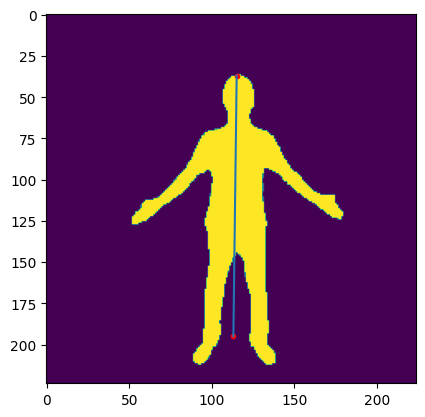

In [33]:
plt.imshow(mask_scaled_f)
plt.plot(orient_t[0],orient_t[1], marker='.', color="red")
plt.plot(orient_b[0],orient_b[1], marker='.', color="red")
plt.plot([orient_b[0],orient_t[0]],[orient_b[1],orient_t[1]])
plt.show()

In [10]:
def rotateImage(image, angle):
    row,col = image.shape
    center=tuple(np.array([row,col])/2)
    rot_mat = cv2.getRotationMatrix2D(center,angle,1.0)
    new_image = cv2.warpAffine(image, rot_mat, (col,row))
    return new_image

In [11]:
import math
angle = math.degrees(math.atan((orient_t[0]-orient_b[0])/(orient_b[1]-orient_t[1])))

In [12]:
angle

0.725224299059252

In [13]:
new_img = rotateImage(cv2.cvtColor(bg_removed_f, cv2.COLOR_BGR2GRAY),angle)

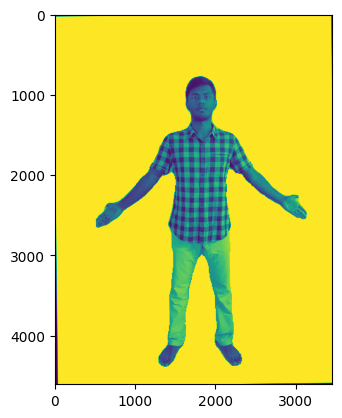

In [14]:
plt.imshow(new_img)
plt.show()

In [15]:
front_image = Image.open(front_img_dir)
res_im,seg_f=seg_model.run(front_image)
mask_f, bg_removed_f = bg_removal(front_image, seg_f)

In [17]:
cv2.cvtColor(inp_f, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.5.2) c:\users\runneradmin\appdata\local\temp\pip-req-build-inblc7p7\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xeb40fe9a::Set<1,-1,-1>,struct cv::impl::A0xeb40fe9a::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [36]:
n = (((inp_f / 2.)+0.5)*255).astype(int)

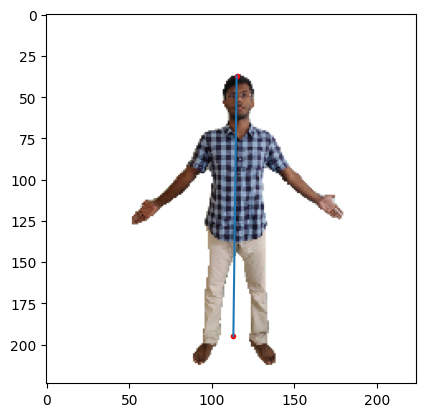

In [38]:
plt.imshow(n)
plt.plot(orient_t[0],orient_t[1], marker='.', color="red")
plt.plot(orient_b[0],orient_b[1], marker='.', color="red")
plt.plot([orient_b[0],orient_t[0]],[orient_b[1],orient_t[1]])
plt.show()

In [77]:
b,g,r = cv2.split(n)
nn = (b+g+r)/3
rotated =(rotateImage(nn,44))

In [78]:
np.shape(rotated)

(224, 224)

In [79]:
cv2.cvtColor(rotated,cv2.COLOR_GRAY2RGB)

error: OpenCV(4.5.2) c:\users\runneradmin\appdata\local\temp\pip-req-build-inblc7p7\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xeb40fe9a::Set<3,4,-1>,struct cv::impl::A0xeb40fe9a::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


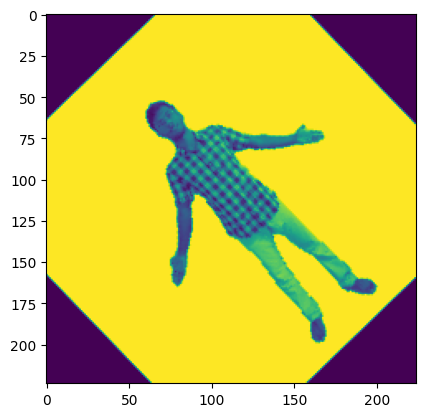

In [68]:
plt.imshow(rotated)
plt.show()

In [103]:
front_image = Image.open("..\\..\\sample_data\\input\\36.jpg")
res_im,seg_f=seg_model.run(front_image)
mask_f, bg_removed_f = bg_removal(front_image, seg_f)

In [104]:
ori_f, inp_f, param_f = preprocess_image("..\\..\\out\\bg_rem_img.jpg",224)
joints_f, vertices_f, cams_f = hmr(inp_f, hmr_model)
joints_f = joints_f[0]
img_f, joints_f = convert_to_int(inp_f, joints_f)
mask_scaled_f = preprocess_gray(mask_f)
top_f, bottom_f  = ht_pts(mask_scaled_f,ht_factor)
ht_p_f = (joints_f[0][1]+joints_f[5][1])/2 - top_f
shifted_neck_f = shift_neck(joints_f, neck_shift_factor, ht_p_f)
mask_crop_f = mask_scaled_f[top_f:int((joints_f[8][1]+joints_f[9][1])/2),joints_f[8][0]:joints_f[9][0]] 
orient_t = [joints_f[13][0],joints_f[13][1]]
orient_b = (joints_f[0][0]+joints_f[5][0])/2,(joints_f[0][1]+joints_f[5][1])/2


Resizing image to 224


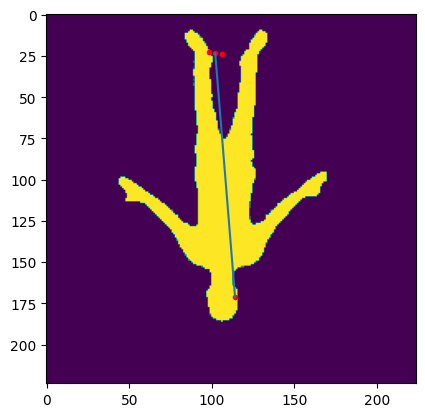

In [109]:
plt.imshow(mask_scaled_f)
plt.plot(orient_t[0],orient_t[1], marker='.', color="red")
plt.plot(orient_b[0],orient_b[1], marker='.', color="red")
plt.plot(joints_f[0][0],joints_f[0][1], marker='.', color="red")
plt.plot(joints_f[5][0],joints_f[5][1], marker='.', color="red")
plt.plot([orient_b[0],orient_t[0]],[orient_b[1],orient_t[1]])
plt.show()

In [110]:
angle = math.degrees(math.atan((orient_t[0]-orient_b[0])/(orient_b[1]-orient_t[1])))

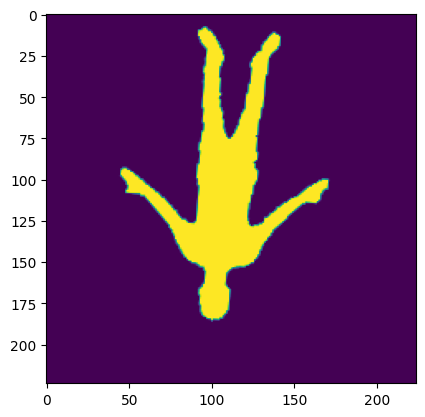

In [111]:
new_img = rotateImage(mask_scaled_f,angle)
plt.imshow(new_img)
plt.show()